In [1]:
import sys
sys.path.append('../src/')

In [2]:
# Third-party libraries:
import numpy as np
# My libraries:
import dataset.dataset as dtset
from dbclass.dbclass import DBCLASS
from dbclass import dbclass_utils as db_utils

In [3]:
# Defining the mean and sigma arrays:
mean_array = np.array([[10, 10],
                        [5, 20],
                        [10, 30],
                        [50, 50],
                        [30, 20],
                        [50, 10]])
sigma_array = np.array([[2, 1],
                        [2, 3],
                        [6, 3],
                        [8, 4],
                        [8, 8],
                        [6, 7]])

In [4]:
# Creating the dataset:
ds = dtset.create_dataset(mean_array, sigma_array, n_samples=10000)
# Splitting the data for trainning and for test:
ds_train, ds_test = dtset.split_data(ds, prop_train=0.8)

0% concluído...
0% concluído...
10% concluído...
20% concluído...
30% concluído...
40% concluído...
50% concluído...
60% concluído...
70% concluído...
80% concluído...
90% concluído...


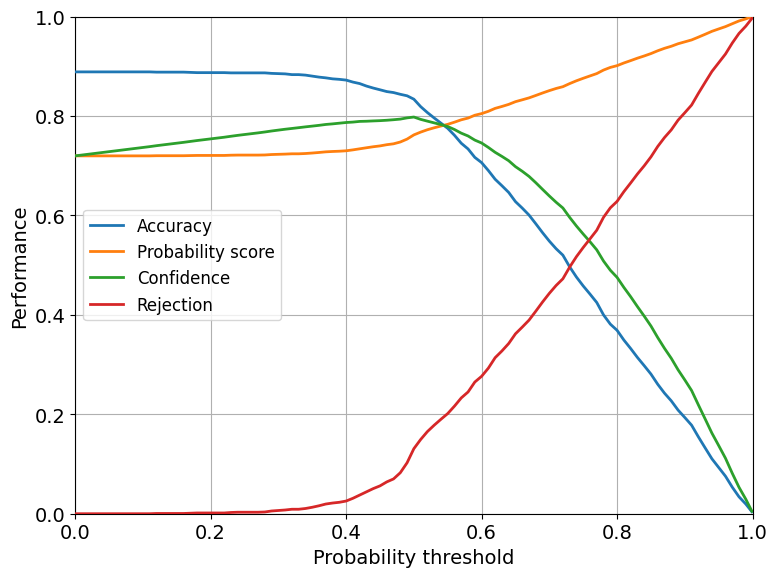


Best probability threshold value: 0.5
accuracy 0.8337
prob_score 0.761888
rejection 0.1308
confidence 0.797794


In [5]:
# Trainning the model using cross validation in the trainning dataset:
dbclass = DBCLASS()
prob_thold_list = np.append(np.arange(0, 1, 0.01), 0.999)
best_prob_thold, class_metrics = db_utils.cross_validation_trainning(dbclass, ds_train, ds_test, prob_thold_list)
print("\nBest probability threshold value:", best_prob_thold)
for metric in class_metrics.keys():
    print(metric, class_metrics[metric])